### <center><b>ONLINE FOOD DATASET.</b></center>

IMPORT LIBRARY PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always') 
import shap
import pickle

# Model Classifier
from sklearn.svm import SVC
from collections import Counter
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn import under_sampling, over_sampling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


from flask import Flask, render_template, request


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


LOAD & DISPLAY DATA

In [2]:
online_food = pd.read_csv('onlinefoods.csv')
online_food.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


#### <b> DATA EXPLORATION </b>

CHECK THE NUMBER OF ROWS AND COLUMNS

In [3]:
print('The total number of rows and columns is',online_food.shape,'respectively.')

The total number of rows and columns is (388, 13) respectively.


CHECK FOR THE COLUMNS

In [4]:
online_food.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

CHECK THE OVERALL INFO

In [5]:
online_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


CHECK FOR MISSING AND DUPLICATED VALUES

In [6]:
online_food.isna()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,False,False,False,False,False,False,False,False,False,False,False,False,False
384,False,False,False,False,False,False,False,False,False,False,False,False,False
385,False,False,False,False,False,False,False,False,False,False,False,False,False
386,False,False,False,False,False,False,False,False,False,False,False,False,False


CHECK THE TOTAL NUMBER OF MISSING VALUES

In [7]:
#Display the total sum of missing values in each column.
online_food.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

CHECK THE TOTAL NUMBER OF DUPLICATE ROWS

In [8]:
#Check the total number of duplicate rows
print ("There are",online_food.duplicated().sum(), "duplicate values in this dataset.")

There are 103 duplicate values in this dataset.


In [9]:
#Display duplicates
duplicates = online_food[online_food.duplicated(keep=False)]
print("The duplicate rows are as shown below:")

duplicates

The duplicate rows are as shown below:


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive,Yes
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes


In [10]:
online_food.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


<AxesSubplot: >

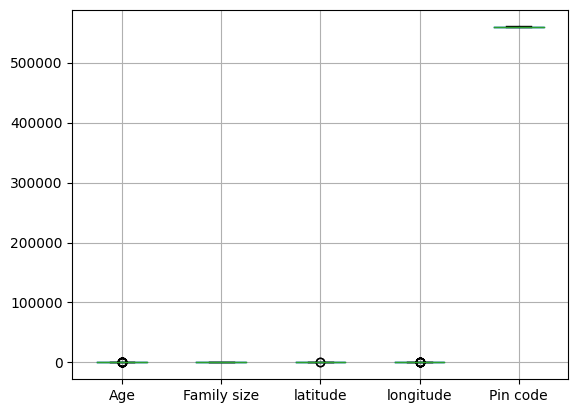

In [11]:
online_food.boxplot()

##### <b> DATA CLEANING </b>

In [12]:
#Drop unneeded column(s)
online_food.drop (columns=['Unnamed: 12'], inplace = True)
online_food.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


#### <b>EXPLORATORY DATA ANALYSIS, (E.D.A)</b>

UNIVARIATE ANALYSIS

AGE COLUMN

In [15]:
# Extract the values from the 'Age' column and count occurrences
age_counts = online_food['Age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Count']

# Create the bar chart with color grading
fig = px.bar(age_counts, x='Age', y='Count', title='Age Distribution',
             labels={'Age': 'Age', 'Count': 'Number of People'},
             color='Age', color_continuous_scale='Viridis')

# Show the plot
fig.show()

GENDER COLUMN

In [30]:
# Create the histogram chart
fig = px.histogram(online_food, x='Gender', title='Gender Distribution', color='Gender',
                   color_discrete_sequence=['#636EFA', '#EF553B'])

# Add data labels
fig.update_traces(texttemplate='%{value}', textposition='outside')

# Show the plot
fig.show()

MARITAL STATUS

In [19]:
# Extract the values from the 'Gender' column and count occurrences
marital_status_counts = online_food['Marital Status'].value_counts().reset_index()
marital_status_counts.columns = ['Marital Status', 'Count']

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA']

# Create the pie chart
fig = px.pie(marital_status_counts, names='Marital Status', values='Count', title='Marital Status Distribution')

# Update the chart to add data labels
fig.update_traces(textinfo='percent+label')

# Show the plot
fig.show()

OCCUPATION

In [33]:
# Extract the values from the 'Age' column and count occurrences
occupation_counts = online_food['Occupation'].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'Count']

# Create the bar chart with color grading
fig = px.bar(occupation_counts, x='Occupation', y='Count', title='Occupation Distribution',
             labels={'Occupation': 'Occupation', 'Count': 'Number of People'},
             color='Occupation', color_continuous_scale='Viridis')

# Show the plot
fig.show()

MONTHLY INCOME

In [35]:
# Extract the values from the 'Monthly Income' column and count occurrences
monthly_income_counts = online_food['Monthly Income'].value_counts().reset_index()
monthly_income_counts.columns = ['Monthly Income', 'Count']

# Calculate the total count
total_count = monthly_income_counts['Count'].sum()

# Calculate the percentage for each income category
monthly_income_counts['Percentage'] = (monthly_income_counts['Count'] / total_count) * 100

# Create the bar chart
fig = px.bar(monthly_income_counts, x='Monthly Income', y='Count', title='Monthly Income Distribution',
             labels={'Monthly Income': 'Monthly Income', 'Count': 'Number of People'},
             color='Monthly Income', color_continuous_scale='Viridis')

# Add data labels with percentages
fig.update_traces(texttemplate='%{y} (%{customdata:.1f}%)', textposition='outside',
                  customdata=monthly_income_counts['Percentage'])

# Show the plot
fig.show()

In [ ]:
# Columns to exclude from the loop
exclude_columns = ['latitude', 'longitude',]

# Loop through each column
for column in online_food.columns:
    # Skip excluded columns
    if column in exclude_columns:
        continue
    
    # Get unique values and their counts
    value_counts = online_food[column].value_counts()
    
    # Create bar chart
    fig = px.bar(value_counts, x=value_counts.index, y=value_counts.values, 
                 labels={'x': column, 'y': 'Count'}, 
                 title=f"Value Counts for {column}")
    
    # Show plot
    fig.show()

In [ ]:
# Central tendency
mean_value = online_food['Age'].mean()
median_value = online_food['Age'].median()
mode_value = online_food['Age'].mode().values[0]

In [ ]:
# Variability or dispersion
range_value = online_food['Age'].max() - online_food['Age'].min()
variance_value = online_food['Age'].var()
std_deviation_value = online_food['Age'].std()

In [ ]:
# Skewness and Kurtosis
skewness_value = online_food['Age'].skew()
kurtosis_value = online_food['Age'].kurtosis()

In [ ]:
# Visualization (box plot for numerical variable)
plt.figure(figsize=(8,8))
sns.boxplot(online_food['Age'])
plt.title('Box Plot')
plt.xlabel('Age')
plt.show()

BIVARIATE ANALYSIS

In [ ]:
#Bivariate analysis for 'Age' vs 'Output'
fig = px.box(online_food, x='Age', y='Output', title='Age vs Output')
fig.update_xaxes(title='Age')
fig.update_yaxes(title='Output')
fig.show()


# Bivariate analysis for 'Age' vs 'Marital Status'
fig = px.histogram(online_food, x='Age', color='Marital Status', 
                   title='Age vs Marital Status',
                   labels={'Age': 'Age', 'Marital Status': 'Marital Status', 'count': 'Count'},
                   barmode='group')

fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()


# Bivariate analysis for 'Age' vs 'Monthly Income'
fig = px.histogram(online_food, x='Age', color='Monthly Income', 
             title='Age vs Monthly Income', 
             labels={'Age': 'Age', 'Monthly Income': 'Monthly Income', 'count': 'Count'})

fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()


# Bivariate analysis for 'Age' vs 'Occupation'
fig = px.histogram(online_food, x='Age', color='Occupation', 
             title='Age vs Occupation', 
             labels={'Age': 'Age', 'Occupation': 'Occupation', 'count': 'Count'})

fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()


# Bivariate analysis for 'Gender' vs 'Output'
fig = px.histogram(online_food, x='Gender', color='Educational Qualifications', 
             title='Gender vs Educational Qualifications', 
             labels={'Gender': 'Gender', 'Educational Qualifications': 'Educational Qualifications', 'count': 'Count'})

fig.update_layout(xaxis_title='Gender', yaxis_title='Count')
fig.show()


#Bivariate analysis for 'Marital Status' vs 'Gender'
# Create a cross-tabulation
cross_tab = pd.crosstab(online_food['Gender'], online_food['Marital Status'])

# Plot the heatmap
fig = px.imshow(cross_tab,
                labels=dict(x="Marital Status", y="Gender", color="Count"),
                x=cross_tab.columns,
                y=cross_tab.index,
                color_continuous_scale='viridis')

fig.update_layout(title='Gender vs. Marital Status',
                  xaxis_title='Marital Status',
                  yaxis_title='Gender')

fig.show()


# Bivariate analysis for 'Gender' vs 'Output'
fig = px.histogram(online_food, x='Gender', color='Output', 
                   title='Gender vs Output',
                   labels={'Gender': 'Gender', 'Output': 'Output', 'count': 'Count'},
                   barmode='group')

fig.update_layout(xaxis_title='Gender', yaxis_title='Count')
fig.show()


# Bivariate analysis for 'Marital Status' vs 'Output'
fig = px.histogram(online_food, x='Marital Status', color='Output', 
                   title='Marital Status vs Output',
                   labels={'Marital Status': 'Marital Status', 'Output': 'Output', 'count': 'Count'},
                   barmode='group')

fig.update_layout(xaxis_title='Marital Status', yaxis_title='Count')
fig.show()

# Bivariate analysis for 'Marital Status' vs 'Monthly Income'
fig = px.histogram(online_food, x='Marital Status', color='Monthly Income', 
                   title='Marital Status vs Monthly Income',
                   labels={'Marital Status': 'Marital Status', 'Monthly Income': 'Monthly Income', 'count': 'Count'},
                   barmode='group')

fig.update_layout(xaxis_title='Marital Status', yaxis_title='Monthly Income')
fig.show()


# Bivariate analysis for 'Occupation' vs 'Output'
fig = px.histogram(online_food, x='Occupation', color='Output', 
                   title='Occupation vs Output',
                   labels={'Occupation': 'Occupation', 'Output': 'Output', 'count': 'Count'},
                   barmode='group')

fig.update_layout(xaxis_title='Occupation', yaxis_title='Count')
fig.show()


# Bivariate analysis for 'Educational Qualifications' vs 'Output'
fig = px.histogram(online_food, x='Educational Qualifications', color='Output', 
                   title='Educational Qualifications vs Output',
                   labels={'Educational Qualifications': 'Educational Qualifications', 'Output': 'Output', 'count': 'Count'},
                   barmode='group')

fig.update_layout(xaxis_title='Educational Qualifications', yaxis_title='Count')
fig.show()


# Bivariate analysis for 'Family size' vs 'Output'
fig = px.box(online_food, x='Output', y='Family size', 
             title='Family size vs Output', 
             labels={'Output': 'Output', 'Family size': 'Family size'})

fig.update_xaxes(title='Output')
fig.update_yaxes(title='Family size')
fig.show()


# Bivariate analysis for 'Feedback' vs 'Output'
fig = px.histogram(online_food, x='Feedback', color='Output', 
                   title='Feedback vs Output',
                   labels={'Feedback': 'Feedback', 'Output': 'Output', 'count': 'Count'},
                   barmode='group')

fig.update_layout(xaxis_title='Feedback', yaxis_title='Count')
fig.show()


# Bivariate analysis for 'Monthly Income' vs 'Output'
fig = px.histogram(online_food, x='Output', y='Monthly Income', 
                   title='Monthly Income vs Output',
                   labels={'Output': 'Output', 'Monthly Income': 'Monthly Income', 'count': 'Count'})

fig.update_layout(xaxis_title='Output', yaxis_title='Monthly Income')
fig.show()

MULTIVARIATE ANALYSIS

In [ ]:
# Pairplot for numerical variables
# Create the pairplot
g = sns.pairplot(online_food, diag_kind='kde', height=3, aspect=1.5)
g.fig.suptitle('Pairplot of Numerical Variables', y=1.02)

# Adjust plot aesthetics
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


# Boxplot of 'Rating' by 'Gender' and 'Marital Status'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Marital Status', hue='Family size', data=online_food)
plt.title('Age by Marital Status and Family size')
plt.xlabel('Age')
plt.ylabel('Marital Status')
plt.show()


# Barplot of 'Feedback' by 'Occupation' and 'Educational Qualifications'
plt.figure(figsize=(10, 6))
sns.histplot(x='Occupation', y='Feedback', hue='Educational Qualifications', data=online_food)
plt.title('Feedback by Occupation and Educational Qualifications')
plt.xlabel('Occupation')
plt.ylabel('Feedback')
plt.xticks(rotation=45)
plt.show()


# Barplot of Feedback by Occupation and Educational Qualifications
fig = px.bar(online_food, x='Occupation', y='Feedback', color='Educational Qualifications',
             title='Feedback by Occupation and Educational Qualifications')

fig.update_layout(xaxis_title='Occupation', yaxis_title='Feedback')
fig.update_xaxes(tickangle=45)
fig.show()

LABEL ENCODING

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over categorical columns and apply label encoding
for column in ['Gender', 'Marital Status', 'Occupation', 'Monthly Income','Educational Qualifications','Output','Feedback']:
    online_food[column] = label_encoder.fit_transform(online_food[column].values)

# Display the encoded dataset
online_food

CORRELATION HEATMAP

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(10, 10))
correlation_matrix = online_food.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### <b> MODELLING </b>

LOGISTIC REGRESSION

# Load the dataset
X = online_food[['Age', 'Monthly Income', 'Family size']]
y = online_food['Output']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

In [ ]:
# Load the dataset
X = online_food[['Age', 'Monthly Income', 'Family size']]
y = online_food['Output']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Create a pipeline for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ("scaler", scaler),
        ("model", model)
    ])

# Train and evaluate models using pipelines
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification = classification_report(y_test, y_pred)
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{classification}\n")

CHECK FOR DATA IMBALANCE

In [ ]:
# Assuming your data is in a DataFrame called 'df' with a target column 'target'
target_counts = online_food['Output'].value_counts()
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Class Distribution')
plt.show()

In [ ]:
# Assuming your data is in X_train and y_train
print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_resampled))

In [ ]:
# Assuming your classifier is RandomForestClassifier
classifier = RandomForestClassifier(class_weight='balanced')

HYPERPARAMETER TUNING

In [ ]:
# Define the model
model = RandomForestClassifier()

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Step 4: Feature Importance Analysis for Random Forest
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print("Feature Importances for Random Forest:\n", feature_importance_df)

# Step 5: Address Class Imbalance (if applicable)
# For example, if there's class imbalance, you can upsample the minority class
X_train_balanced, y_train_balanced = resample(X_train[y_train == 1], y_train[y_train == 1], 
                                              replace=True, n_samples=sum(y_train == 0), random_state=42)
X_train_balanced = pd.concat([X_train[y_train == 0], X_train_balanced])
y_train_balanced = pd.concat([y_train[y_train == 0], y_train_balanced])

# Evaluate performance
print("XGBoost Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("Classification Report:\n", classification_report(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1]))

# Step 7: Model Interpretability with SHAP values
explainer = shap.TreeExplainer(best_rf_model)  # For Random Forest
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [ ]:
app = Flask(__app.py__)

# Load the pre-trained model
model = pickle.load(open('model.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Get user input from the form
    age = int(request.form['age'])
    monthly_income = int(request.form['monthly_income'])
    family_size = int(request.form['family_size'])

    # Make prediction using the model
    prediction = model.predict([[age, monthly_income, family_size]])

    # Map prediction to human-readable output
    output = "Satisfied" if prediction[0] == 1 else "Not Satisfied"

    return render_template('index.html', prediction_text='Customer is {}'.format(output))

if __name__ == '__main__':
    app.run(debug=True)